# First Things First

Welcome to our very first introduction to *Tensor Fox*, a specialized library made to deal with tensors of any order with focus on the CPD (Canonical Polyadic Decomposition). In order to have everything working properly, all files of Tensor Fox must be in the same folder of your program. To be able to use Tensor Fox properly you will need the following modules:

- numpy

- pandas

- scipy

- sklearn

- matplotlib

- numba

Make sure Numba and Numpy updated. Additionaly, make sure you are using a nice version of BLAS. That is all! Tensor Fox is read to go! Let's start importing Tensor Fox and other necessary modules for this first lesson.

In [1]:
import numpy as np
import TensorFox as tfx

# Creating Tensors and Getting Information 

Let's create a little tensor $T$ just to see how Tensor Fox works at its basics. For third order tensors (3D arrays) I use the convention that $T_{ijk}$ refers to the $i$-th row, $j$-column and $k$-slice (frontal slice) of $T$. For instance, consider the tensor defined above (the frontal slices of $T$ are showed)

$$T = \left\{ \left[
\begin{array}{cc}
    0 & 1\\
    2 & 3
\end{array}
\right], \quad
\left[
\begin{array}{cc}
    4 & 5\\
    6 & 7
\end{array}
\right] \right\}.$$

Since Numpy's convention is different from ours with regard to third order tensors. This convention may be irrelevant when using the routines of Tensor Fox, but since I build all the modules thinking this way, it is fair that this point is made explicitly. The function **showtens** prints a third order tensor with this particular convention and print tensors of higher order just as Numpy would print. Below we show both conventions with an example of third order tensor. This particular tensor will be our toy model through all lessons.

In [2]:
# Create and print the tensor, which is 2 x 2 x 2.
m = 2
T = np.zeros((m, m, m))
s = 0

for k in range(m):
    for i in range(m):
        for j in range(m):
            T[i,j,k] = s
            s += 1

print('Our view of T:')
print('--------------')          
tfx.disp.showtens(T)
print()
print('Numpy view of T:')
print('----------------')
print(T)

Our view of T:
--------------
[[0. 1.]
 [2. 3.]]

[[4. 5.]
 [6. 7.]]


Numpy view of T:
----------------
[[[0. 4.]
  [1. 5.]]

 [[2. 6.]
  [3. 7.]]]


There are a lot of questions we can make about a given tensor $T$. What are its maximum and minimum entries, what are the dimensions of $T$, the rank and multirank, etc. Even in the case of the simple tensor above we can't know all these answers in advance. The function **infotens** shows lots of information about $T$ for your convenience. This function is useful for small tensors, but remember that finding the rank is a NP-hard task, so don't abuse. 

T is a tensor of dimensions (2, 2, 2)

|T| = 11.832159566199232

max(T) = 7.0

min(T) = 0.0

mean(T) = 3.5

mean(|T|) = 3.5

var(T) = 5.25



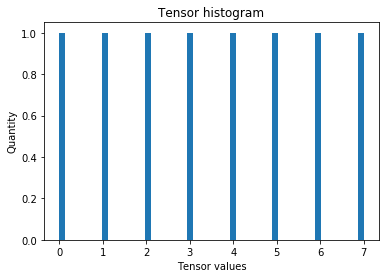


1 <= rank(T) <= 4

Generic rank of the tensor space of T = 2

Computing multilinear rank...
------------------------------------
Estimated multirank(T) = (2, 2, 2)
|T - (U1, U2, U3)*S|/|T| = 3.79522791426588e-16

Computing rank...
Start searching for rank
Stops at r = 4  or less
-----------------------------
Testing r = 3
Estimated rank(T) = 3
|T - T_approx|/|T| = 7.095109256249347e-05



In [3]:
# Let's see some information about T.
tfx.disp.infotens(T)

# Computing the CPD

Now let's turn to the most important tool of Tensor Fox, the computation of the CPD. As the previous function hinted, $T$ should have rank 3. We can compute the corresponding CPD with the function **cpd**.

In [4]:
# Compute the CPD of T, assuming T has rank 3.
r = 3
factors, T_approx, output = tfx.cpd(T, r)

# 'factors' is the list of the factor matrices associated with the CPD.
X = factors[0]
Y = factors[1]
Z = factors[2]

# Show the CPD computed. 
print('X =\n', X)
print()
print('Y =\n', Y)
print()
print('Z =\n', Z)
print()

# Show the coordinate representation of this CPD.
print('T_approx =')
tfx.disp.showtens(T_approx)

# Show relative error of this approximation.
print('|T - T_approx|/|T| =', output.rel_error)

X =
 [[-0.78579333  0.32885006 -1.46804748]
 [-0.81534841 -1.43147236 -1.52080922]]

Y =
 [[-1.12624364  1.04827295 -1.17955224]
 [-0.11764123  1.02877563 -1.75404691]]

Z =
 [[-0.66403767 -1.07719906  0.55377193]
 [ 0.91723398 -0.99844763  2.03994135]]

T_approx =
[[-7.39856771e-05  1.00016096e+00]
 [ 2.00004052e+00  2.99988438e+00]]

[[3.99999912 4.99990115]
 [5.99992039 7.00004535]]

|T - T_approx|/|T| = 2.147392646230274e-05


If it is convenient to use normalized factors, we can convert everything to the format $\Lambda, X, Y, Z$, where the columns of $X, Y, Z$ are unit norm and their magnitudes are passed to the central tensor $\Lambda \in \mathbb{R}^{r \times r \times r}$. Since $\Lambda$ is a diagonal tensor, we can store its values as a unidimensional array of size $r$. This is made such that
$$T \approx \sum_{\ell=1}^r \Lambda_{\ell} \ X_{:, \ell} \otimes Y_{:, \ell} \otimes Z_{:, \ell}.$$

We denote this relation as $T \approx (X, Y, Z) \cdot \Lambda$, the multilinear multiplication. With a simple command we can obtain this factorization.

In [5]:
Lambda, factors = tfx.cnv.normalize(factors)
X = factors[0]
Y = factors[1]
Z = factors[2]

print('Lambda =\n', Lambda)
print()
print('X =\n', X)
print()
print('Y =\n', Y)
print()
print('Z =\n', Z)
print()

Lambda =
 [1.45199885 3.16849022 9.4443757 ]

X =
 [[-0.69393626  0.22389641 -0.69451615]
 [-0.72003643 -0.97461295 -0.71947711]]

Y =
 [[-0.99458887  0.71371297 -0.55803242]
 [-0.1038893   0.70043829 -0.82981915]]

Z =
 [[-0.5864135  -0.73340721  0.26198305]
 [ 0.81001186 -0.67978957  0.96507248]]



There are some submodules to TensorFox. In particular, *cnv* refers to the *Conversion* module, which is responsible for converting objects with a certain format to another format. We will see more in the next lessons.